# BPL_TEST2_Fedbatch script with FMPy

The key library FMPy is installed.

After the installation a small application BPL_TEST2_Fedbatch is loaded and run. You can continue with this example if you like.

In [1]:
!lsb_release -a # Actual VM Ubuntu version used by Google

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.4 LTS
Release:	22.04
Codename:	jammy


In [2]:
%env PYTHONPATH=

env: PYTHONPATH=


In [3]:
!python --version

Python 3.11.11


In [4]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py311_24.11.1-0-Linux-x86_64.sh
!chmod +x Miniconda3-py311_24.11.1-0-Linux-x86_64.sh
!bash ./Miniconda3-py311_24.11.1-0-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.11/site-packages/')

--2025-03-25 09:30:09--  https://repo.anaconda.com/miniconda/Miniconda3-py311_24.11.1-0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145900576 (139M) [application/octet-stream]
Saving to: ‘Miniconda3-py311_24.11.1-0-Linux-x86_64.sh’

Miniconda3-py311_24 100%[===================>] 139.14M   190MB/s    in 0.7s    

2025-03-25 09:30:10 (190 MB/s) - ‘Miniconda3-py311_24.11.1-0-Linux-x86_64.sh’ saved [145900576/145900576]

PREFIX=/usr/local
Unpacking payload ...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.


In [5]:
!conda update -n base -c defaults conda --yes

Channels:
 - defaults
Platform: linux-64
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.2.25  |       h06a4308_0         129 KB
    certifi-2025.1.31          |  py311h06a4308_0         163 KB
    openssl-3.0.16             |       h5eee18b_0         5.2 MB
    ------------------------------------------------------------
                                           Total:         5.5 MB

The following packages will be UPDATED:

  ca-certificates                     2024.11.26-h06a4308_0 --> 2025.2.25-h06a4308_0 
  certifi                         2024.8.30-py311h06a4308_0 --> 2025.1.31-py311h06a4308_0 
  openssl                                 3.0.15-h5eee18b_0 --> 3.0.16-h5eee18b_0 



openssl-3.0.16       | 5.2 MB    | :   0% 0/1 [00:00<?,

In [6]:
!conda --version
!python --version

conda 24.11.1
Python 3.11.11


In [7]:
!conda config --set channel_priority strict

In [8]:
!conda install -c conda-forge fmpy --yes # Install the key package

Streaming output truncated to the last 5000 lines.
libarrow-13.0.0      | 26.6 MB   | :  14% 0.1400471235079244/1 [00:04<00:12, 14.86s/it] 





python-3.11.11       | 29.2 MB   | :  14% 0.14191360383108156/1 [00:04<00:14, 16.49s/it]







mathjax-2.7.7        | 21.2 MB   | :  23% 0.22721211272299704/1 [00:04<00:10, 12.97s/it]




libllvm19-19.1.7     | 38.3 MB   | :  12% 0.11591015792961291/1 [00:04<00:19, 21.55s/it]






libarrow-13.0.0      | 26.6 MB   | :  15% 0.1471083230125256/1 [00:04<00:12, 14.83s/it]





python-3.11.11       | 29.2 MB   | :  15% 0.1483398802309796/1 [00:04<00:14, 16.45s/it] 







mathjax-2.7.7        | 21.2 MB   | :  24% 0.23677119837153737/1 [00:04<00:09, 12.73s/it]




libllvm19-19.1.7     | 38.3 MB   | :  12% 0.12080777023649797/1 [00:04<00:18, 21.57s/it]






libarrow-13.0.0      | 26.6 MB   | :  15% 0.15416952251712684/1 [00:04<00:12, 15.12s/it]





python-3.11.11       | 29.2 MB   | :  15% 0.15476615663087764/1 [00:04<00:13, 16.42s/it]




libllvm

In [9]:
#!conda install matplotlib --yes

In [10]:
#!conda install scipy --yes

In [11]:
#!conda install xlrd --yes

In [12]:
#!conda install openpyxl --yes

# BPL_TEST2_Fedbatch setup


Now specific installation and the run simulations. Start with connecting to Github. Then upload the two files:

* FMU - BPL_TEST2_Fedbatch_linux_om_me.fmu
* Setup-file - BPL_TEST2_Fedbatch_fmpy_explore.py

In [13]:
%%bash
git clone https://github.com/janpeter19/BPL_TEST2_Fedbatch

Cloning into 'BPL_TEST2_Fedbatch'...


In [14]:
%cd BPL_TEST2_Fedbatch

/content/BPL_TEST2_Fedbatch


In [15]:
run -i BPL_TEST2_Fedbatch_fmpy_explore.py

Linux - run FMU pre-comiled OpenModelica

Model for the process has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values/units

Note that both disp() and describe() takes values from the last simulation
and the command process_diagram() brings up the main configuration

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [16]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [25/2.54, 20/2.54]

In [17]:
import warnings
warnings.filterwarnings("ignore")

## BPL_TEST2_Fedbatch - demo



In [18]:
describe('culture'); print(); #describe('liquidphase')                                  # Pump schedule parameter


Simplified text book model - only substrate S and cell concentration X



No processDiagram.png file in the FMU, but try the file on disk.


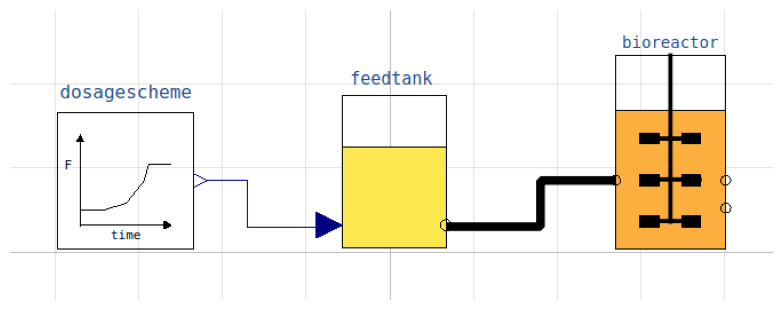

In [19]:
process_diagram()

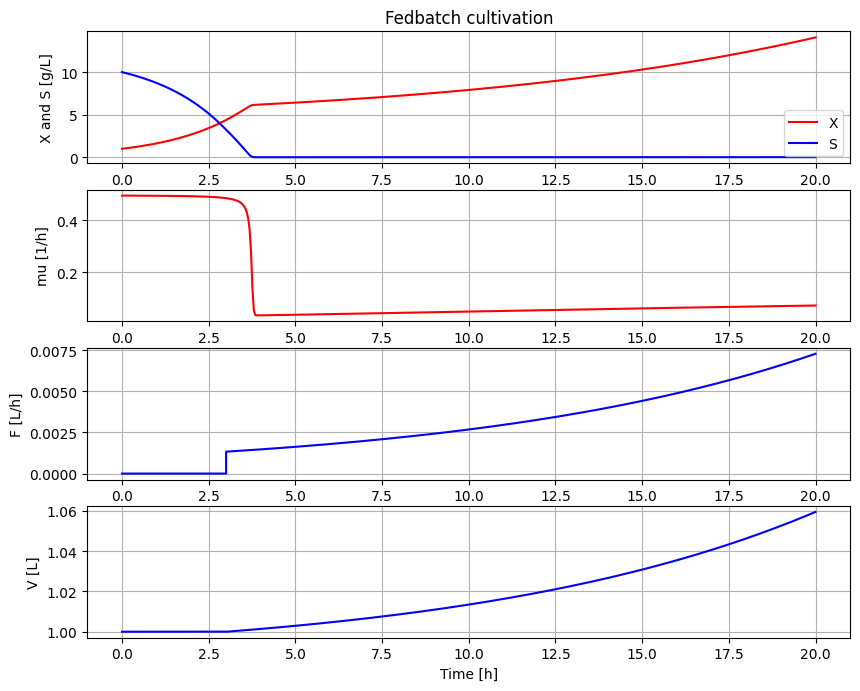

In [20]:
# Simulation with default values of the process
newplot(plotType='TimeSeries')
simu(20)

In [21]:
disp(mode='long')

bioreactor.V_start : V_start : 1.0
bioreactor.m_start[1] : VX_start : 0.0
bioreactor.m_start[2] : VS_start : 0.0
bioreactor.culture.Y : Y : 0.5
bioreactor.culture.qSmax : qSmax : 1.0
bioreactor.culture.Ks : Ks : 0.1
feedtank.c_in[2] : feedtank.S_in : 0.0
feedtank.V_start : feedtank.V_start : 100.0
dosagescheme.mu_feed : mu_feed : 0.2
dosagescheme.t_startExp : t_startExp : 2.0
dosagescheme.F_startExp : F_startExp : 0.12
dosagescheme.F_max : F_max : 3.0


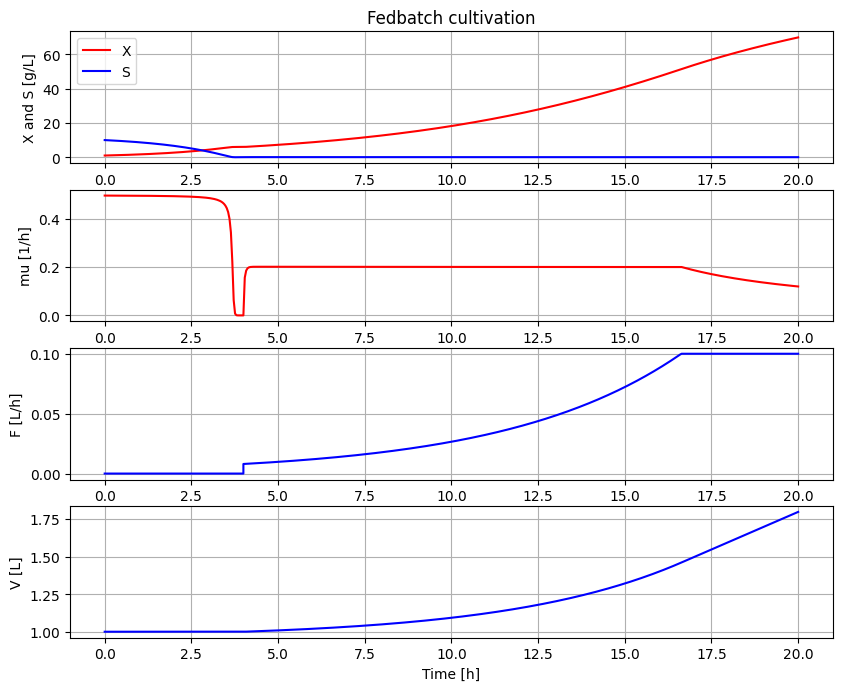

In [22]:
# A more typical feed scheme for the culture at hand
newplot(plotType='TimeSeries')
par(t_startExp=4, F_startExp=0.008, mu_feed=0.2, F_max=0.1)
simu(20)

In [23]:
disp('culture')

Y : 0.5
qSmax : 1.0
Ks : 0.1


In [24]:
describe('mu')

Cell specific growth rate variable : 0.12 [ 1/h ]


In [25]:
describe('parts')

['bioreactor', 'bioreactor.culture', 'dosagescheme', 'feedtank']


In [26]:
describe('MSL')

MSL: 3.2.3 - used components: RealInput, RealOutput


In [27]:
system_info()


System information
 -OS: Linux
 -Python: 3.11.11
 -Scipy: not installed in the notebook
 -FMPy: 0.3.19
 -FMU by: OpenModelica Compiler OpenModelica 1.25.0~dev-133-ga5470be
 -FMI: 2.0
 -Type: ME
 -Name: BPL.Examples_TEST2.Fedbatch
 -Generated: 2024-11-06T21:37:05Z
 -MSL: 3.2.3
 -Description: Bioprocess Library version 2.3.0
 -Interaction: FMU-explore for FMPy version 1.0.1
